In [1]:
import pandas as pd
import seaborn as sns

In [2]:
GENERATED_FOLDER = "data/generated/"
DATA_PATH = GENERATED_FOLDER + "clean_train.csv"

data = pd.read_csv(DATA_PATH)
#data = d[['PAM50','RFSE','RFS']]

In [3]:
data['RFSE'] = data['RFSE'].astype('category')
data['RFSE'] = data['RFSE'].cat.codes.values

In [4]:
b0 = data.loc[(data['RFSE'] == 0) & (data['PAM50'] == 'Basal')]
b1 = data.loc[(data['RFSE'] == 1) & (data['PAM50'] == 'Basal')]
h0 = data.loc[(data['RFSE'] == 0) & (data['PAM50'] == 'Her2')]
h1 = data.loc[(data['RFSE'] == 1) & (data['PAM50'] == 'Her2')]
A0 = data.loc[(data['RFSE'] == 0) & (data['PAM50'] == 'LumA')]
A1 = data.loc[(data['RFSE'] == 1) & (data['PAM50'] == 'LumA')]
B0 = data.loc[(data['RFSE'] == 0) & (data['PAM50'] == 'LumB')]
B1 = data.loc[(data['RFSE'] == 1) & (data['PAM50'] == 'LumB')]

In [5]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np

msk = np.random.rand(len(b1)) < 0.7

train = b1[msk]
test = b1[~msk]

list_x = np.array(train[['ESR1', 'ERBB2', 'PROLIF']])
list_y = np.array(train['RFS'])

list_x_pred = np.array(test[['ESR1', 'ERBB2', 'PROLIF']])
list_y_pred = np.array(test['RFS'])

<AxesSubplot:xlabel='RFS', ylabel='Count'>

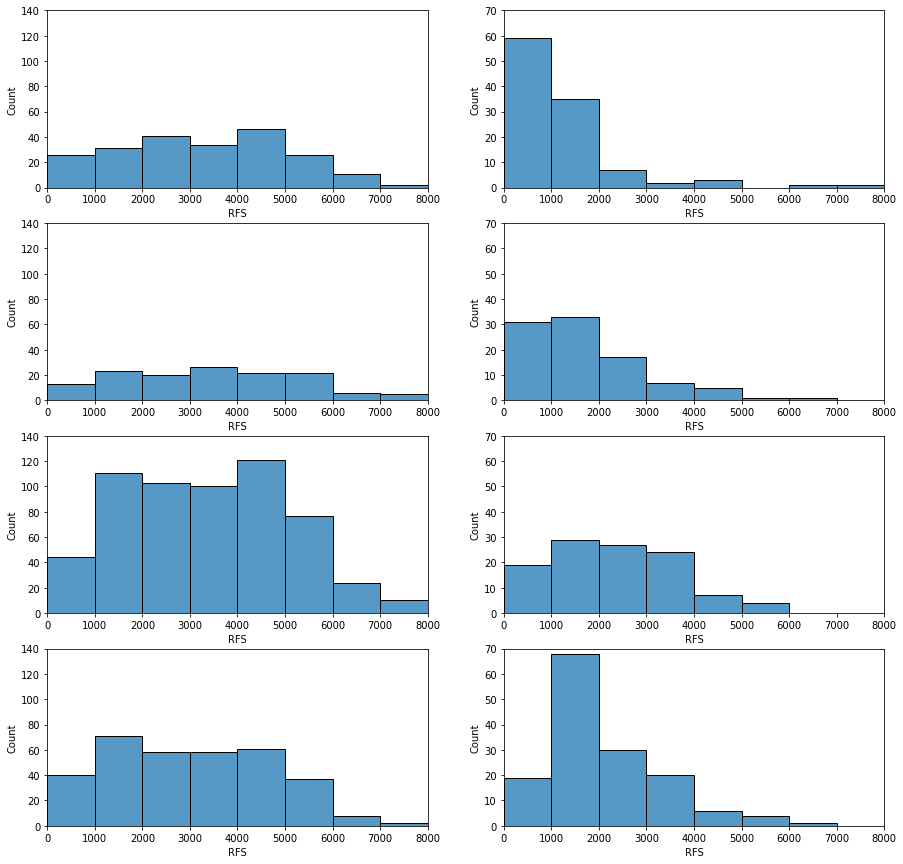

In [6]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(4, 2,figsize=(15,15))
axes[0,0].set_xlim([0, 8000])
axes[0,1].set_xlim([0, 8000])
axes[1,0].set_xlim([0, 8000])
axes[1,1].set_xlim([0, 8000])
axes[2,0].set_xlim([0, 8000])
axes[2,1].set_xlim([0, 8000])
axes[3,0].set_xlim([0, 8000])
axes[3,1].set_xlim([0, 8000])
axes[0,0].set_ylim([0, 140])
axes[0,1].set_ylim([0, 70])
axes[1,0].set_ylim([0, 140])
axes[1,1].set_ylim([0, 70])
axes[2,0].set_ylim([0, 140])
axes[2,1].set_ylim([0, 70])
axes[3,0].set_ylim([0, 140])
axes[3,1].set_ylim([0, 70])

sns.histplot(data=b0[['PAM50','RFSE','RFS']], x = 'RFS', ax=axes[0,0],bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
sns.histplot(data=b1[['PAM50','RFSE','RFS']], x = 'RFS', ax=axes[0,1],bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
sns.histplot(data=h0[['PAM50','RFSE','RFS']], x = 'RFS', ax=axes[1,0],bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
sns.histplot(data=h1[['PAM50','RFSE','RFS']], x = 'RFS', ax=axes[1,1],bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
sns.histplot(data=A0[['PAM50','RFSE','RFS']], x = 'RFS', ax=axes[2,0],bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
sns.histplot(data=A1[['PAM50','RFSE','RFS']], x = 'RFS', ax=axes[2,1],bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
sns.histplot(data=B0[['PAM50','RFSE','RFS']], x = 'RFS', ax=axes[3,0],bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
sns.histplot(data=B1[['PAM50','RFSE','RFS']], x = 'RFS', ax=axes[3,1],bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])

In [7]:
recauen = data[data['RFSE'] == 1]

In [8]:
recauen

,submitter,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,stage,lymph_nodes_positive,TP53.mut,PIK3CA.mut,NPI,CELLULARITY,INTCLUST,HT,RT,CT
3,MB-0008,0.052183,0.000000,0.087170,0.000000,0.000000,0.105195,0.064576,0.089692,0.054062,...,2.0,8.0,1,0,6.080,3.0,9,1,1,1
4,MB-0010,0.098869,0.000000,0.038915,0.046231,0.000000,0.045777,0.067479,0.071380,0.022438,...,4.0,0.0,1,1,4.062,2.0,7,1,1,0
24,MB-0079,0.051092,0.000000,0.165332,0.148099,0.116902,0.000000,0.147250,0.000000,0.000000,...,2.0,4.0,1,1,6.080,3.0,10,0,1,1
26,MB-0083,0.000000,0.185226,0.000000,0.018992,0.222656,0.000000,0.134877,0.015750,0.029141,...,1.0,0.0,0,1,3.026,2.0,2,1,1,0
35,MB-0108,0.000000,0.000000,0.000000,0.000000,0.000000,0.197415,0.123666,0.146157,0.000000,...,1.0,0.0,1,0,4.036,1.0,4ER+,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,MB-7291,0.126623,0.001253,0.079993,0.061003,0.079826,0.000000,0.312798,0.004997,0.000000,...,2.0,22.0,1,1,6.100,3.0,1,1,0,0
1745,MB-7292,0.000000,0.124734,0.176352,0.005746,0.000000,0.134407,0.000000,0.145330,0.006246,...,1.0,1.0,0,0,4.030,3.0,6,1,1,0
1747,MB-7294,0.024111,0.146140,0.030107,0.097334,0.078661,0.000000,0.019035,0.000000,0.062904,...,1.0,1.0,1,0,4.030,3.0,1,1,0,0
1749,MB-7296,0.063419,0.028544,0.011797,0.058478,0.062116,0.102514,0.000000,0.049919,0.000000,...,1.0,1.0,1,0,5.040,3.0,5,0,1,0


In [11]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pd.DataFrame(pca.fit_transform(recauen[['Cell_Cycle',
       'HIPPO', 'MYC', 'NOTCH', 'NRF2', 'PI3K', 'TGF.Beta', 'RTK_RAS', 'TP53',
       'WNT', 'Hypoxia', 'SRC', 'ESR1', 'ERBB2', 'PROLIF']]))
finalDf = pd.concat([recauen.loc[:,"PAM"], X_reduced], axis=1, join="inner")

px.scatter(x = finalDf.iloc[:,1], y = finalDf.iloc[:,2], hover_data=[finalDf.iloc[:,0]], color = finalDf.iloc[:,0], marginal_x = 'box', marginal_y = 'box')


In [10]:
finalDf

,RFSE,0,1
3,1,0.175849,-0.118172
4,1,-0.206588,-0.164365
24,1,-0.513334,0.027197
26,1,-0.100832,-0.317513
35,1,0.067016,0.022069
...,...,...,...
450,1,-0.166233,-0.039737
455,1,0.155725,-0.189546
457,1,-0.253639,-0.152533
459,1,-0.412318,-0.293647
